In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv('winequality-white.csv',sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [33]:
df.shape

(4898, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,1.688150,0.044655,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,0.710091,0.021012,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.470004,0.008960,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,0.955511,0.034401,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,1.740466,0.041142,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,2.292535,0.048790,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,4.201703,0.297137,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [34]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(937)

In [36]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [37]:
df.shape

(3961, 12)

In [38]:
df.skew()

fixed acidity           0.696100
volatile acidity        1.641081
citric acid             1.310601
residual sugar          1.333639
chlorides               4.969076
free sulfur dioxide     1.566680
total sulfur dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 0.112004
dtype: float64

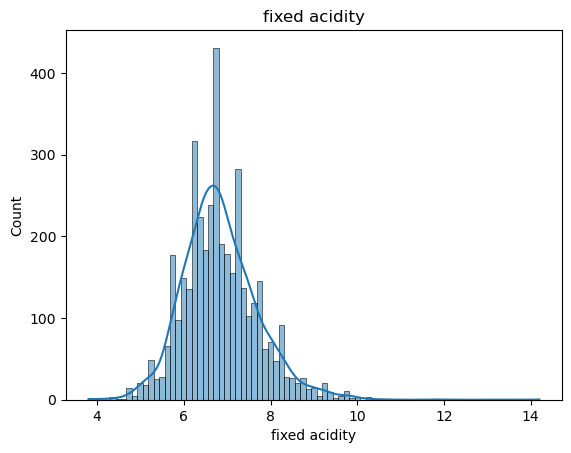

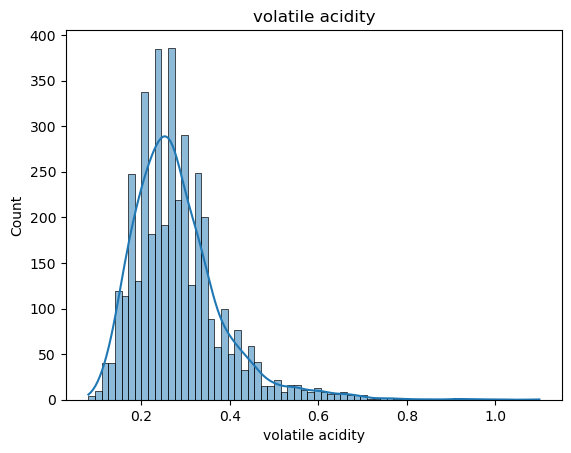

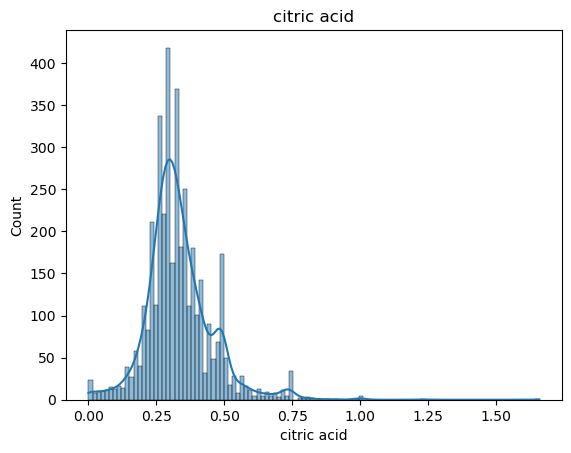

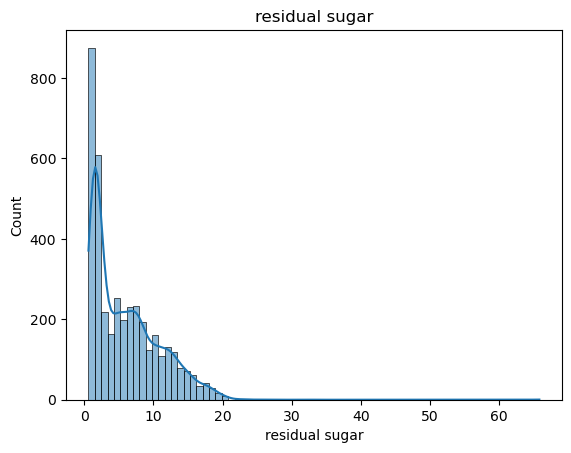

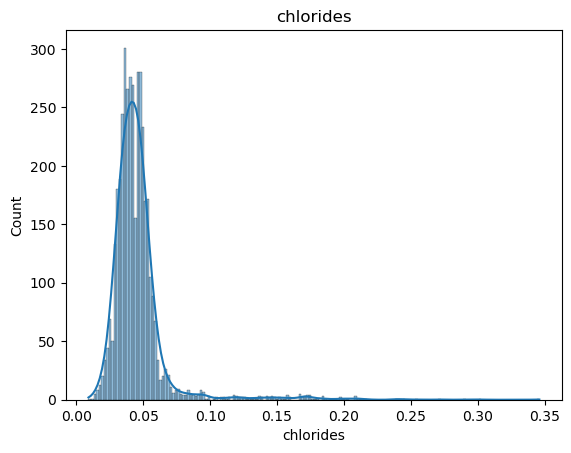

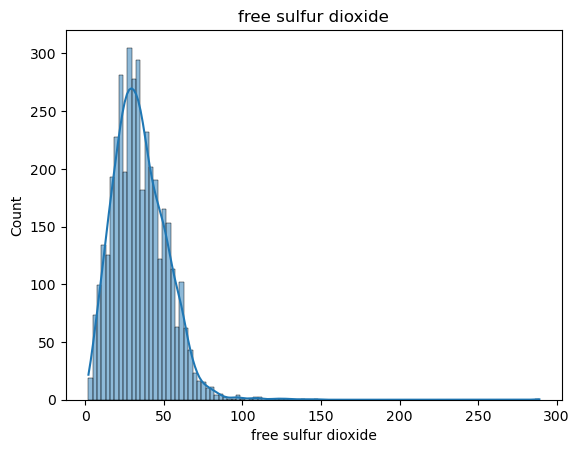

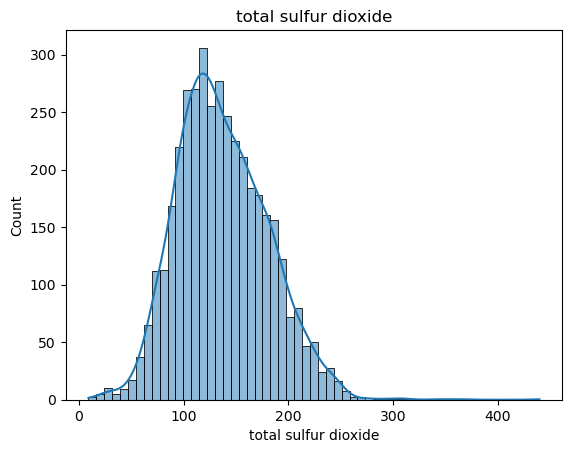

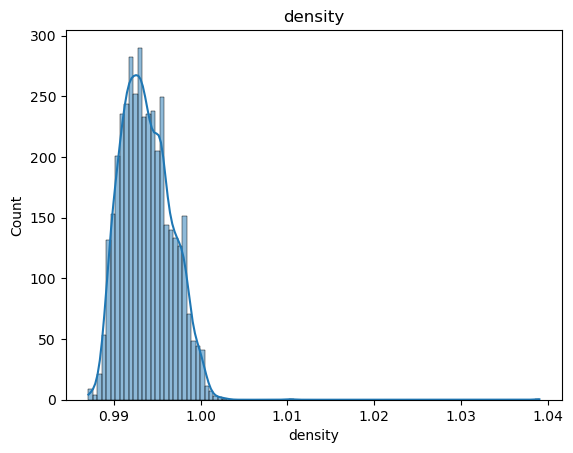

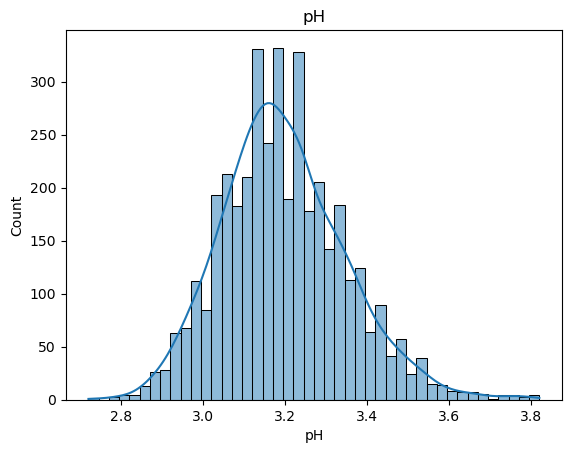

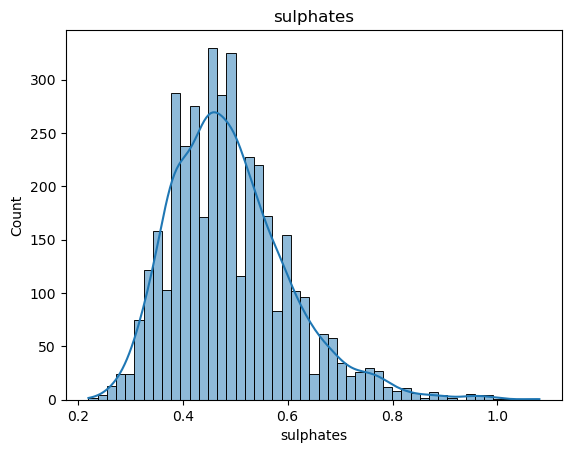

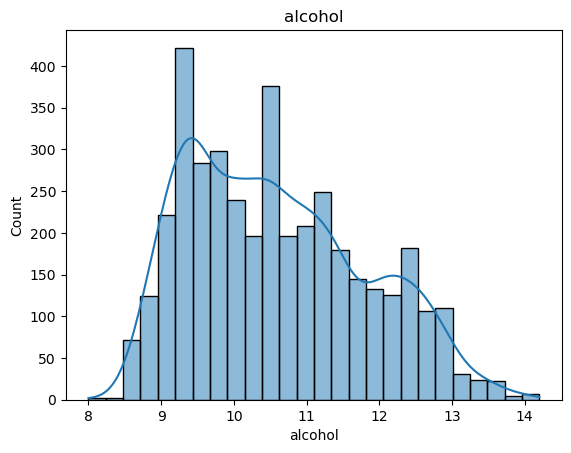

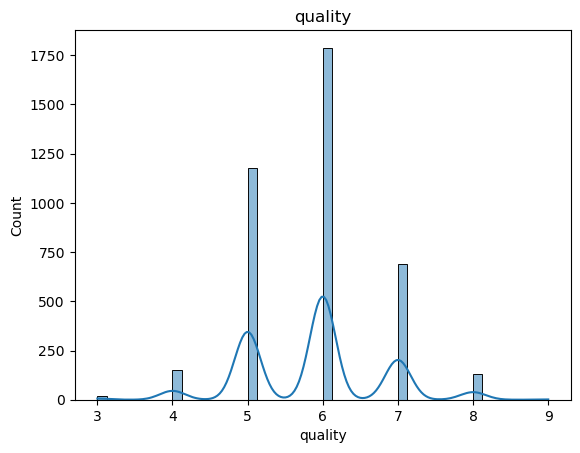

In [39]:
for col in df.columns: 
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [40]:
df['residual sugar'] = np.log1p(df['residual sugar'])  
df['chlorides'] = np.log1p(df['chlorides'])  

C:\Users\kavin\AppData\Local\Temp\ipykernel_30412\2188349036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual sugar'] = np.log1p(df['residual sugar'])
C:\Users\kavin\AppData\Local\Temp\ipykernel_30412\2188349036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chlorides'] = np.log1p(df['chlorides'])


0.11212218768420937


<Axes: xlabel='residual sugar', ylabel='Count'>

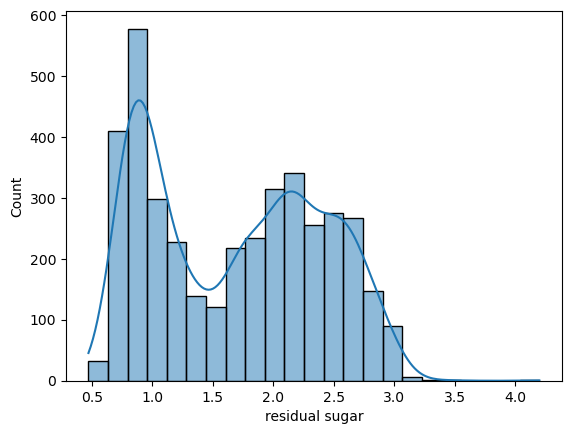

In [41]:
print(df['residual sugar'].skew())
sns.histplot(df['residual sugar'],kde=True)

4.593756270544397


<Axes: xlabel='chlorides', ylabel='Count'>

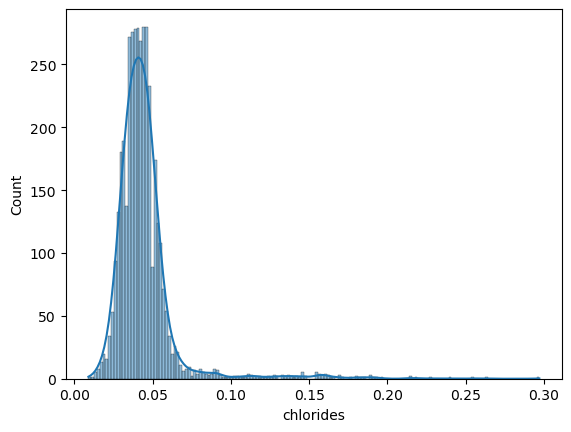

In [42]:
print(df['chlorides'].skew())
sns.histplot(df['chlorides'],kde=True)

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Outliers count per column:\n", outliers.sum())

Outliers count per column:
 fixed acidity           106
volatile acidity        133
citric acid             223
residual sugar            0
chlorides               178
free sulfur dioxide      44
total sulfur dioxide     14
density                   6
pH                       46
sulphates                96
alcohol                   0
quality                 156
dtype: int64


<Axes: >

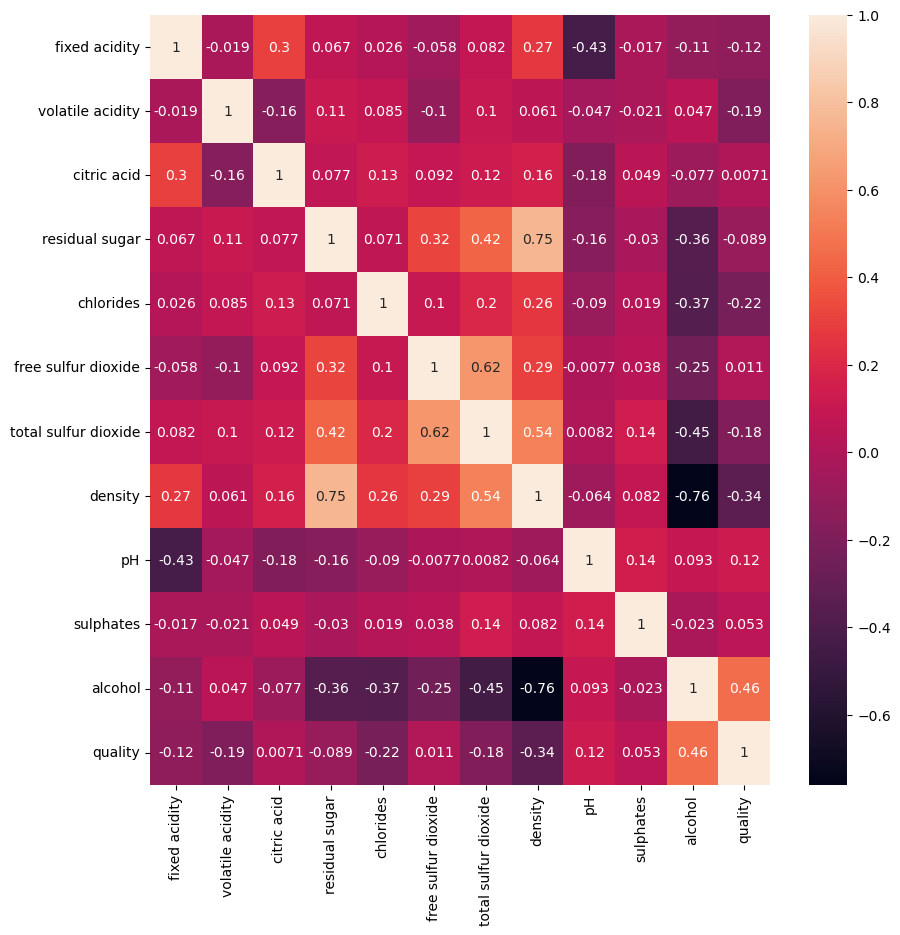

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

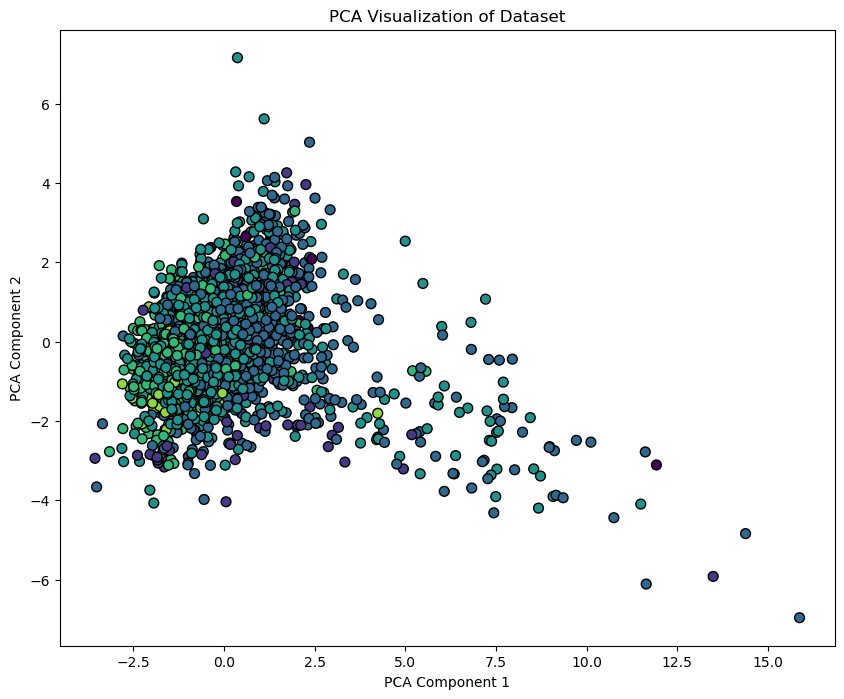

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

X=df.drop("quality",axis=1)
y=df['quality']

scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y , edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Dataset')
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')
plt.show()